# Playing with phone usage

Starting on the first day of this year, I started tracking how often I was using my phone, I've been tinkering with iPython Notebooks and Pineapple pro to explore this data. Here's my first try for analyzing the data with these new tools! 

In [4]:
# Import libraries

import pandas as pd
%matplotlib inline  

### Data

The data is collected and exported in JSON format, with a quick python and dirty python script 'convert.py' I converted into CSV format. We start by reading the data:

In [6]:
# Read local CSV

df = pd.read_csv('usage.csv')

# Describe the dataset
df.describe()

,pickups,minutes
count,279.000000,279.000000
mean,41.326165,75.412186
std,24.627536,47.953725
min,0.000000,0.000000
25%,24.000000,39.500000
50%,39.000000,73.000000
75%,56.500000,103.000000
max,117.000000,229.000000


### Interesting...

This already learns me something useful, I've been using my phone for **70 minutes on average each day**... That's a lot of time spend on a mobile device... On average I would pick it up for **41 times a day**, meaning the average duration of my phone use is about **1,7 minutes per session**.

### So hows the distribution?
Let's find out!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d2554a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d47dc18>]], dtype=object)

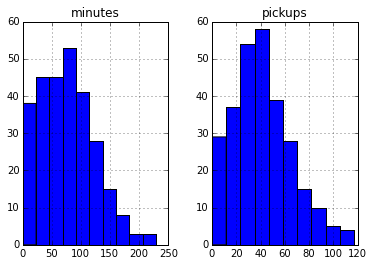

In [7]:
df.hist()

### Pickups
Now for some more interesting things, let's look at the pickups:

In [30]:
# Read local CSV file
df = pd.read_csv('pickups.csv')

# Describe the dataset
df.describe()

,seconds
count,11530.000000
mean,128.692194
std,276.139882
min,0.000000
25%,17.000000
50%,48.000000
75%,132.000000
max,8207.000000


Mmh, it looks like there are some pickups where the length in seconds is rather great, let's remove them. Also note, I picked up my phone over **11530** times. Woah, that's a lot of wear!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e470ba8>]], dtype=object)

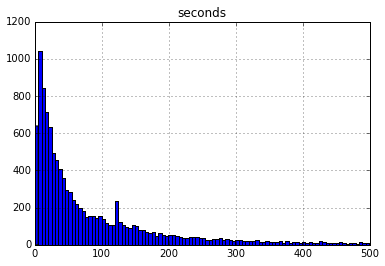

In [38]:

# Filter out values over 10 minutes (600 seconds)
df = df[df['seconds'] < 600]

# Show histogram of usage ()
df.hist(bins=100)

Most of my phone usage is very short, with the exception of 2 minutes exactly (a rare peak in the histogram around 120 seconds... Any ideas what caused it? *D'oh!* It's the time my phone turns off if I don't use it*

### How about dates and times?

Well.. let's have a look, shall we?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e516208>]], dtype=object)

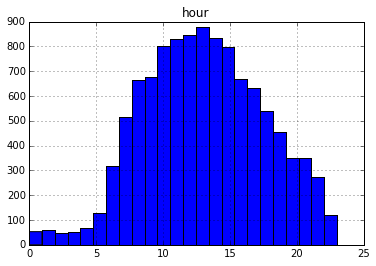

In [73]:
# Create a additional column to save hour 
df['hour'] = pd.to_datetime(df['date']).map( lambda x: x.hour )

# Plot histogram of hours
df.hist(['hour'], bins=24)

As it turns out, phone usage is the highest durign lunch break. There's also a dent in the usage around 19:00 hours, meaning I don't use my phone that often during and after dinner. How about weekdays, could they differ? On we go again:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10da806a0>]], dtype=object)

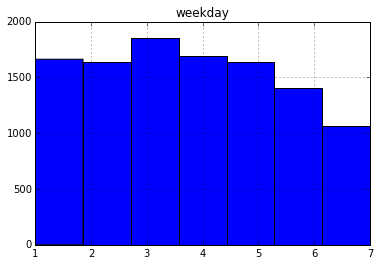

In [74]:
# Create a additional column to save the weekday
df['weekday'] = pd.to_datetime(df['date']).map( lambda x: x.isoweekday() )

# Then plot
df.hist(['weekday'], bins=7)

Sunday is my best day! The peak on wednesday is also very interesting! Mmh...